In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MDS.csv to MDS (5).csv


In [ ]:
Lipid_prop_data = pd.read_csv('MDS.csv')

In [ ]:
drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid','Formal Charge','Formal Charge (pos)','Formal Charge (neg)']
#drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid'
               # ,'NumHBD','Formal Charge','Formal Charge (pos)','Formal Charge (neg)' ,'Number of lipid','AMW','ExactMW','SlogP','XLogP',
               # 'NumHBA','NumLipinskiHBA','NumRotatableBonds','Lipinski Rule of Five']
Lipid_prop_data.drop(drop_columns, axis=1,inplace =True)
Lipid_prop_data.head()

,Luciferase activity (RLU) *,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski Rule of Five,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
0,2,762.127,762.133,761.468258,6.3230,5.7781,6.865,4.21,-4.055,11,0,0,13,11,0,634.70,165.52,114.92,36,32,4,3863,0.534,0.565,10.82,1.004
1,1,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3860,0.508,0.581,10.98,0.995
2,2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3863,0.517,0.569,10.74,1.061
3,2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3863,0.548,0.563,10.70,0.935
4,3,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3860,0.502,0.576,10.88,1.025


In [ ]:
X = Lipid_prop_data.drop(['Luciferase activity (RLU) *'],axis = 1)#.to_numpy()
y= Lipid_prop_data['Luciferase activity (RLU) *']#.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knnCrossValidate(data,label,model,folds):
    test =[]
    train =[]
    
    indexes = data.index.values
    #np.random.shuffle(indexes)
    
    for i in range(folds):
    
        testStart = i*len(data)/folds
        testEnd = (i+1)*len(data)/folds
        test.append(indexes[testStart:testEnd])
        
        trainOne = indexes[ :testStart ]
        trainTwo = indexes[ testEnd:]
        trainFull = np.concatenate([trainOne,trainTwo])
        train.append(trainFull)
        
        knnscore = 0
    
    for trainsl,testsl in zip(train,test):
        model.fit(data.loc[trainsl],label[trainsl])
        modelScore = model.score(data.loc[testsl],label.loc[testsl])
        
        knnscore += modelScore
        return knnscore/folds 


In [ ]:
k=5
 
model = KNeighborsClassifier(k)
folds = 10
 
data = X
classlabel=y

In [ ]:
#knnCrossValidate(data,classlabel,model,folds)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=18)

classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

[[2 2 0 0 0]
 [1 2 2 2 0]
 [0 1 3 1 0]
 [0 0 0 1 0]
 [0 0 0 2 0]]
Accuracy Score 0.42105263157894735
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.40      0.29      0.33         7
           3       0.60      0.60      0.60         5
           4       0.17      1.00      0.29         1
           5       0.00      0.00      0.00         2

    accuracy                           0.42        19
   macro avg       0.37      0.48      0.36        19
weighted avg       0.45      0.42      0.42        19

ROC_Score: 0.7844070961718022


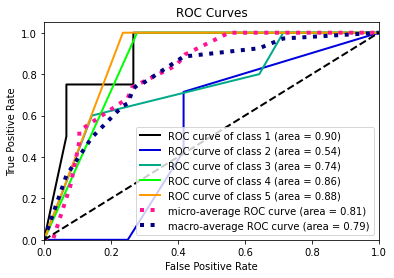

In [ ]:
#calculating the evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
!pip install scikit-plot
import scikitplot as skplt
probs = classifier.predict_proba(X_test)
preds = probs
roc_auc=roc_auc_score(y_test,preds,multi_class="ovr")
print("ROC_Score:",roc_auc)
skplt.metrics.plot_roc_curve(y_test, preds)
plt.show()

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

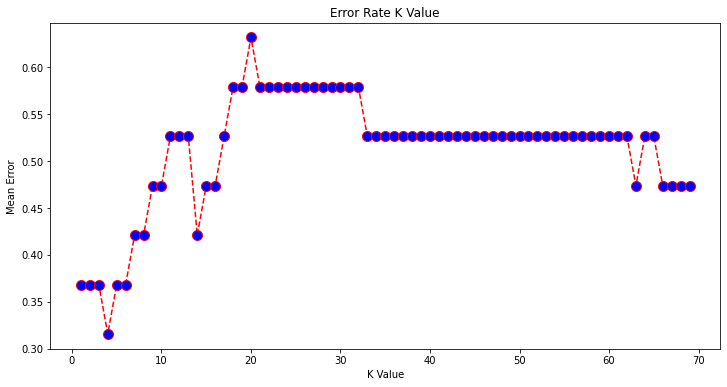

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')